# Import Libraries

In [48]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [49]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [50]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [51]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [52]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

In [55]:
df.describe().round()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.0,1067.0,1067.0,1067.0,1067.0,1067.0
mean,3.0,6.0,13.0,9.0,12.0,26.0,256.0
std,1.0,2.0,4.0,3.0,3.0,7.0,63.0
min,1.0,3.0,5.0,5.0,5.0,11.0,108.0
25%,2.0,4.0,10.0,8.0,9.0,21.0,207.0
50%,3.0,6.0,13.0,9.0,11.0,26.0,251.0
75%,4.0,8.0,16.0,11.0,13.0,31.0,294.0
max,8.0,12.0,30.0,20.0,26.0,60.0,488.0


### Q3 = 294 , Q1 = 207
### IQR = Q3-Q1 = 87

In [56]:
fig1 = px.histogram(df,x='CO2EMISSIONS')
fig2 = px.histogram(df,x='CYLINDERS')
fig3 = px.histogram(df,x='ENGINESIZE')
fig4 = px.histogram(df,x='FUELCONSUMPTION_COMB')
fig5 = px.histogram(df,x='FUELCONSUMPTION_CITY')
fig6 = px.histogram(df,x='FUELCONSUMPTION_HWY')
fig7 = px.histogram(df,x='FUELCONSUMPTION_COMB_MPG')

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()

# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 7 X features with CO2EMISSIONS.

In [57]:
fig1 = px.scatter(df,x="CO2EMISSIONS", y="CO2EMISSIONS")
fig2 = px.scatter(df,x="CYLINDERS", y="CO2EMISSIONS")
fig3 = px.scatter(df,x="ENGINESIZE", y="CO2EMISSIONS")
fig4 = px.scatter(df,x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS")
fig5 = px.scatter(df,x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS")
fig6 = px.scatter(df,x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS")
fig7 = px.scatter(df,x="FUELCONSUMPTION_COMB_MPG", y="CO2EMISSIONS")

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

In [58]:
fig1 = px.box(df, x="CYLINDERS")
fig2 = px.box(df, x="ENGINESIZE")
fig3 = px.box(df, x="FUELCONSUMPTION_COMB")
fig4 = px.box(df, x="FUELCONSUMPTION_CITY")
fig5 = px.box(df, x="FUELCONSUMPTION_HWY")
fig6 = px.box(df, x="FUELCONSUMPTION_COMB_MPG")

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

In [59]:
def out(Q1,Q3):
    IQR=Q3-Q1
    lower = Q1-(1.5*IQR)
    Higher = Q3+(1.5*IQR)
    print(f'The IQR is: {IQR}\n The Higher outt is:{Higher}\n The lower is:{lower}')


print('1. CYLINDERS \n ',out(4,8))
print('2. ENGINESIZE \n ',out(2,4))
print('3. FUELCONSUMPTION_COMB \n ',out(9,13))
print('4. FUELCONSUMPTION_CITY \n ',out(10,15))
print('5. FUELCONSUMPTION_HWY \n ',out(8,11))
print('6. FUELCONSUMPTION_COMB_MPG \n ',out(21,31))


The IQR is: 4
 The Higher outt is:14.0
 The lower is:-2.0
1. CYLINDERS 
  None
The IQR is: 2
 The Higher outt is:7.0
 The lower is:-1.0
2. ENGINESIZE 
  None
The IQR is: 4
 The Higher outt is:19.0
 The lower is:3.0
3. FUELCONSUMPTION_COMB 
  None
The IQR is: 5
 The Higher outt is:22.5
 The lower is:2.5
4. FUELCONSUMPTION_CITY 
  None
The IQR is: 3
 The Higher outt is:15.5
 The lower is:3.5
5. FUELCONSUMPTION_HWY 
  None
The IQR is: 10
 The Higher outt is:46.0
 The lower is:6.0
6. FUELCONSUMPTION_COMB_MPG 
  None


In [60]:
df = df[(df['CYLINDERS']>2)&(df['CYLINDERS']<14)]
fig=px.box(df,x='CYLINDERS')
fig.show()

In [61]:
df = df[(df['ENGINESIZE']>1)&(df['ENGINESIZE']<7)]
fig=px.box(df,x='ENGINESIZE')
fig.show()

In [62]:
df = df[(df['FUELCONSUMPTION_COMB']>3)&(df['FUELCONSUMPTION_COMB']<18.4)]
fig=px.box(df,x='FUELCONSUMPTION_COMB')
fig.show()

In [63]:
df = df[(df['FUELCONSUMPTION_CITY']>2.5)&(df['FUELCONSUMPTION_CITY']<22.5)]
fig=px.box(df,x='FUELCONSUMPTION_CITY')
fig.show()

In [64]:
df = df[(df['FUELCONSUMPTION_HWY']>3.5)&(df['FUELCONSUMPTION_HWY']<14.6)]
fig=px.box(df,x='FUELCONSUMPTION_HWY')
fig.show()

In [65]:
df = df[(df['FUELCONSUMPTION_COMB_MPG']>6)&(df['FUELCONSUMPTION_COMB_MPG']<44)]
fig=px.box(df,x='FUELCONSUMPTION_COMB_MPG')
fig.show()

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [66]:
X= df.loc[:,["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]]
y = df.loc[:,["CO2EMISSIONS"]]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [68]:
# Create the linear regression model
linear_regression_model = LinearRegression()

# Train the model using fit method
linear_regression_model.fit(X_train["ENGINESIZE"].values.reshape (-1, 1) , y_train)

# Print the wight (coefficient, slope) and y bias (y intercept).
wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

[[36.89390185]] [133.03212132]


In [69]:
def find_y(x, beta, b):
    y = []
    for xi in x:
        y.append(xi * beta + b)
    return np.array(y)

# Exercise 5 : Plot the Output

Plot linear regression model (output).

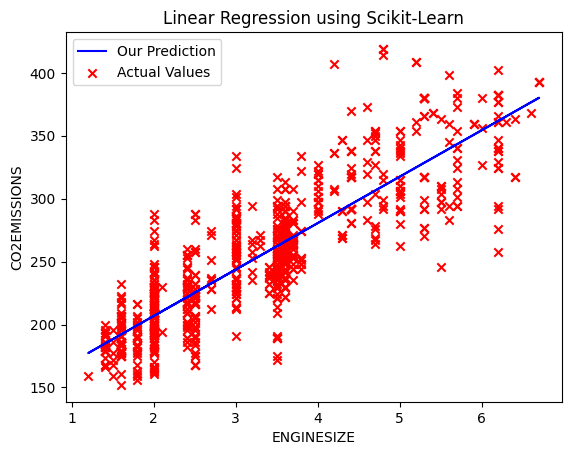

In [70]:
y_pred = find_y(X_test["ENGINESIZE"], wight[0], bias)

plt.plot(X_test["ENGINESIZE"], y_pred, c='b',label='Our Prediction')
plt.scatter(X_train["ENGINESIZE"], y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.legend()

plt.show()

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [71]:
import math
print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

MSE  : 782.85103633808
RMSE : 27.979475269169722
MAE  : 21.15621441651272
R^2  : 0.7881819196029467


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

In [72]:
# Create the linear regression model
linear_regression_model = LinearRegression()

# Train the model using fit method
linear_regression_model.fit(X["CYLINDERS"].values.reshape (-1, 1) , y)

# Print the wight (coefficient, slope) and y bias (y intercept).
wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

[[27.61035071]] [95.32551807]


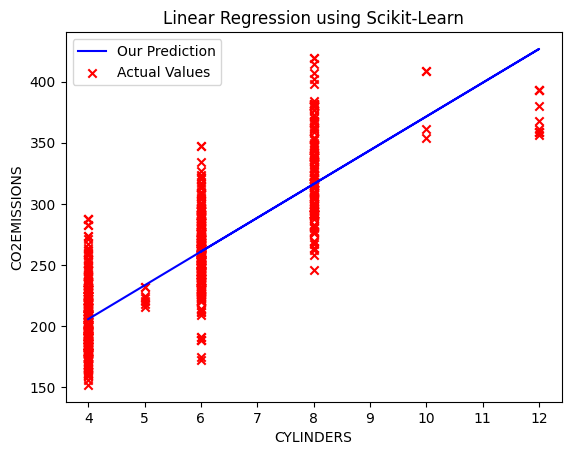

In [73]:
y_pred = find_y(X_test["CYLINDERS"], wight[0], bias)

plt.plot(X_test["CYLINDERS"], y_pred, c='b',label='Our Prediction')
plt.scatter(X_train["CYLINDERS"], y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('CO2EMISSIONS')
plt.xlabel('CYLINDERS')
plt.legend()

plt.show()

In [74]:
# Create the linear regression model
linear_regression_model = LinearRegression()

# Train the model using fit method
linear_regression_model.fit(X["FUELCONSUMPTION_COMB"].values.reshape (-1, 1) , y)

# Print the wight (coefficient, slope) and y bias (y intercept).
wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

[[19.57874249]] [34.17506662]


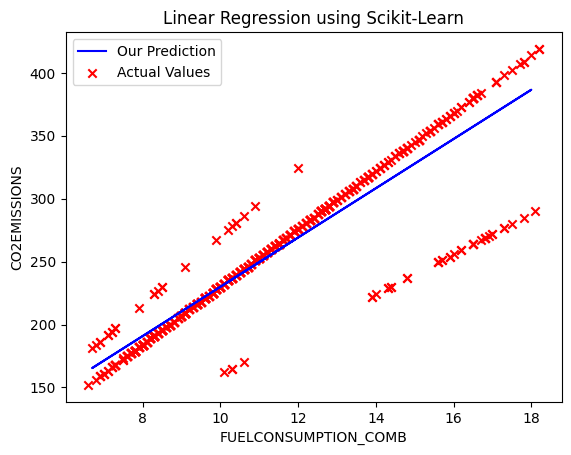

In [75]:
y_pred = find_y(X_test["FUELCONSUMPTION_COMB"], wight[0], bias)

plt.plot(X_test["FUELCONSUMPTION_COMB"], y_pred, c='b',label='Our Prediction')
plt.scatter(X_train["FUELCONSUMPTION_COMB"], y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.legend()

plt.show()

In [76]:
# Create the linear regression model
linear_regression_model = LinearRegression()

# Train the model using fit method
linear_regression_model.fit(X["FUELCONSUMPTION_CITY"].values.reshape (-1, 1) , y)

# Print the wight (coefficient, slope) and y bias (y intercept).
wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

[[16.27801801]] [43.66897824]


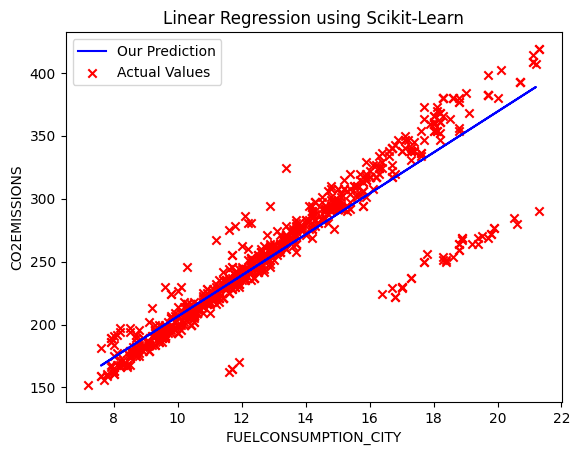

In [77]:
y_pred = find_y(X_test["FUELCONSUMPTION_CITY"], wight[0], bias)

plt.plot(X_test["FUELCONSUMPTION_CITY"], y_pred, c='b',label='Our Prediction')
plt.scatter(X_train["FUELCONSUMPTION_CITY"], y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.legend()

plt.show()

In [78]:
# Create the linear regression model
linear_regression_model = LinearRegression()

# Train the model using fit method
linear_regression_model.fit(X["FUELCONSUMPTION_HWY"].values.reshape (-1, 1) , y)

# Print the wight (coefficient, slope) and y bias (y intercept).
wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

[[24.4624647]] [30.11212702]


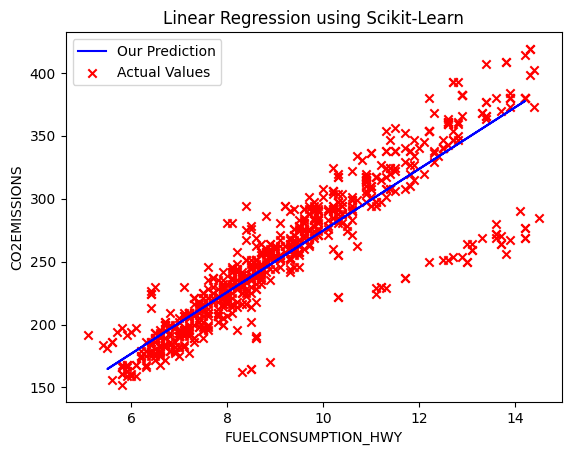

In [79]:
y_pred = find_y(X_test["FUELCONSUMPTION_HWY"], wight[0], bias)

plt.plot(X_test["FUELCONSUMPTION_HWY"], y_pred, c='b',label='Our Prediction')
plt.scatter(X_train["FUELCONSUMPTION_HWY"], y_train, marker='x', c='r',label='Actual Values')

plt.title("Linear Regression using Scikit-Learn")

plt.ylabel('CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_HWY')
plt.legend()

plt.show()

# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

Plot the output for each feature with the Y label.

In [86]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train, y_train)

LinearRegression()

In [87]:
wights = multiple_linear_regression.coef_
intercept = multiple_linear_regression.intercept_

print(f'The wights of the model      : {wights}')
print(f'The Y-intercept of the model : {intercept}')

The wights of the model      : [[  5.85490106   7.69086896 -19.30811445  -8.9983757   35.87956962
   -3.09108675]]
The Y-intercept of the model : [201.6755096]


In [88]:
y_hat = wights[0][0] * X_test['ENGINESIZE'] + wights[0][1] * X_test['CYLINDERS']+ wights[0][2] * X_test['FUELCONSUMPTION_CITY'] + wights[0][3] * X_test['FUELCONSUMPTION_HWY'] + wights[0][4] * X_test['FUELCONSUMPTION_COMB'] + wights[0][5] * X_test['FUELCONSUMPTION_COMB_MPG'] + intercept


print(f'MSE  : {mean_squared_error(y_test, y_hat)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_hat))}')
print(f'MAE  : {mean_absolute_error(y_test, y_hat)}')
print(f'R^2  : {r2_score(y_test, y_hat)}')

MSE  : 252.15935040267752
RMSE : 15.879526139109993
MAE  : 9.201564768400996
R^2  : 0.9317725760365517
